# ADVSTAT MCMC

Using Metropolis Hastings Algorithm


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
%matplotlib inline


0.129265874
0.142338057
0.154569302
0.183964455
0.192549546
0.213460018
0.189675298
0.206261845
0.205577799
0.221976077
0.238506144
0.252400437
0.260596438
0.304413038
0.305887816
0.320905451
0.321388676
0.350131161
0.366786741
0.327940457
0.287688426
0.314359946
0.341382903
0.285780628
0.286652944
0.210968584
0.217871801
0.195179044
0.179163581
0.198141152
0.14077542
0.155987599
0.169612039
0.146680808
0.061457457
0.042900355
0.030932687
0.013473824
0
0.021381145
0.067325192
0.102663387
0.082399307
0.121264418
0.135340705
0.132108744
0.145155824
0.164899025
0.164654274
0.141848556
0.155121559
0.170804413
0.185621227
0.196390245
0.224084696
0.227536305
0.253341785
0.328505265
0.365217828
0.316694489
0.347589522
0.290725842
0.271340354
0.310054849
0.344087709
0.33736021
0.341928884
0.387113577
0.36417607
0.3201712
0.354517842
0.328116175
0.352258607
0.404760709
0.484373627
0.537340128
0.55214439
0.531817554
0.562812998
0.572791284
0.553782335
0.604345261
0.606937105
0.678209682
0.701837

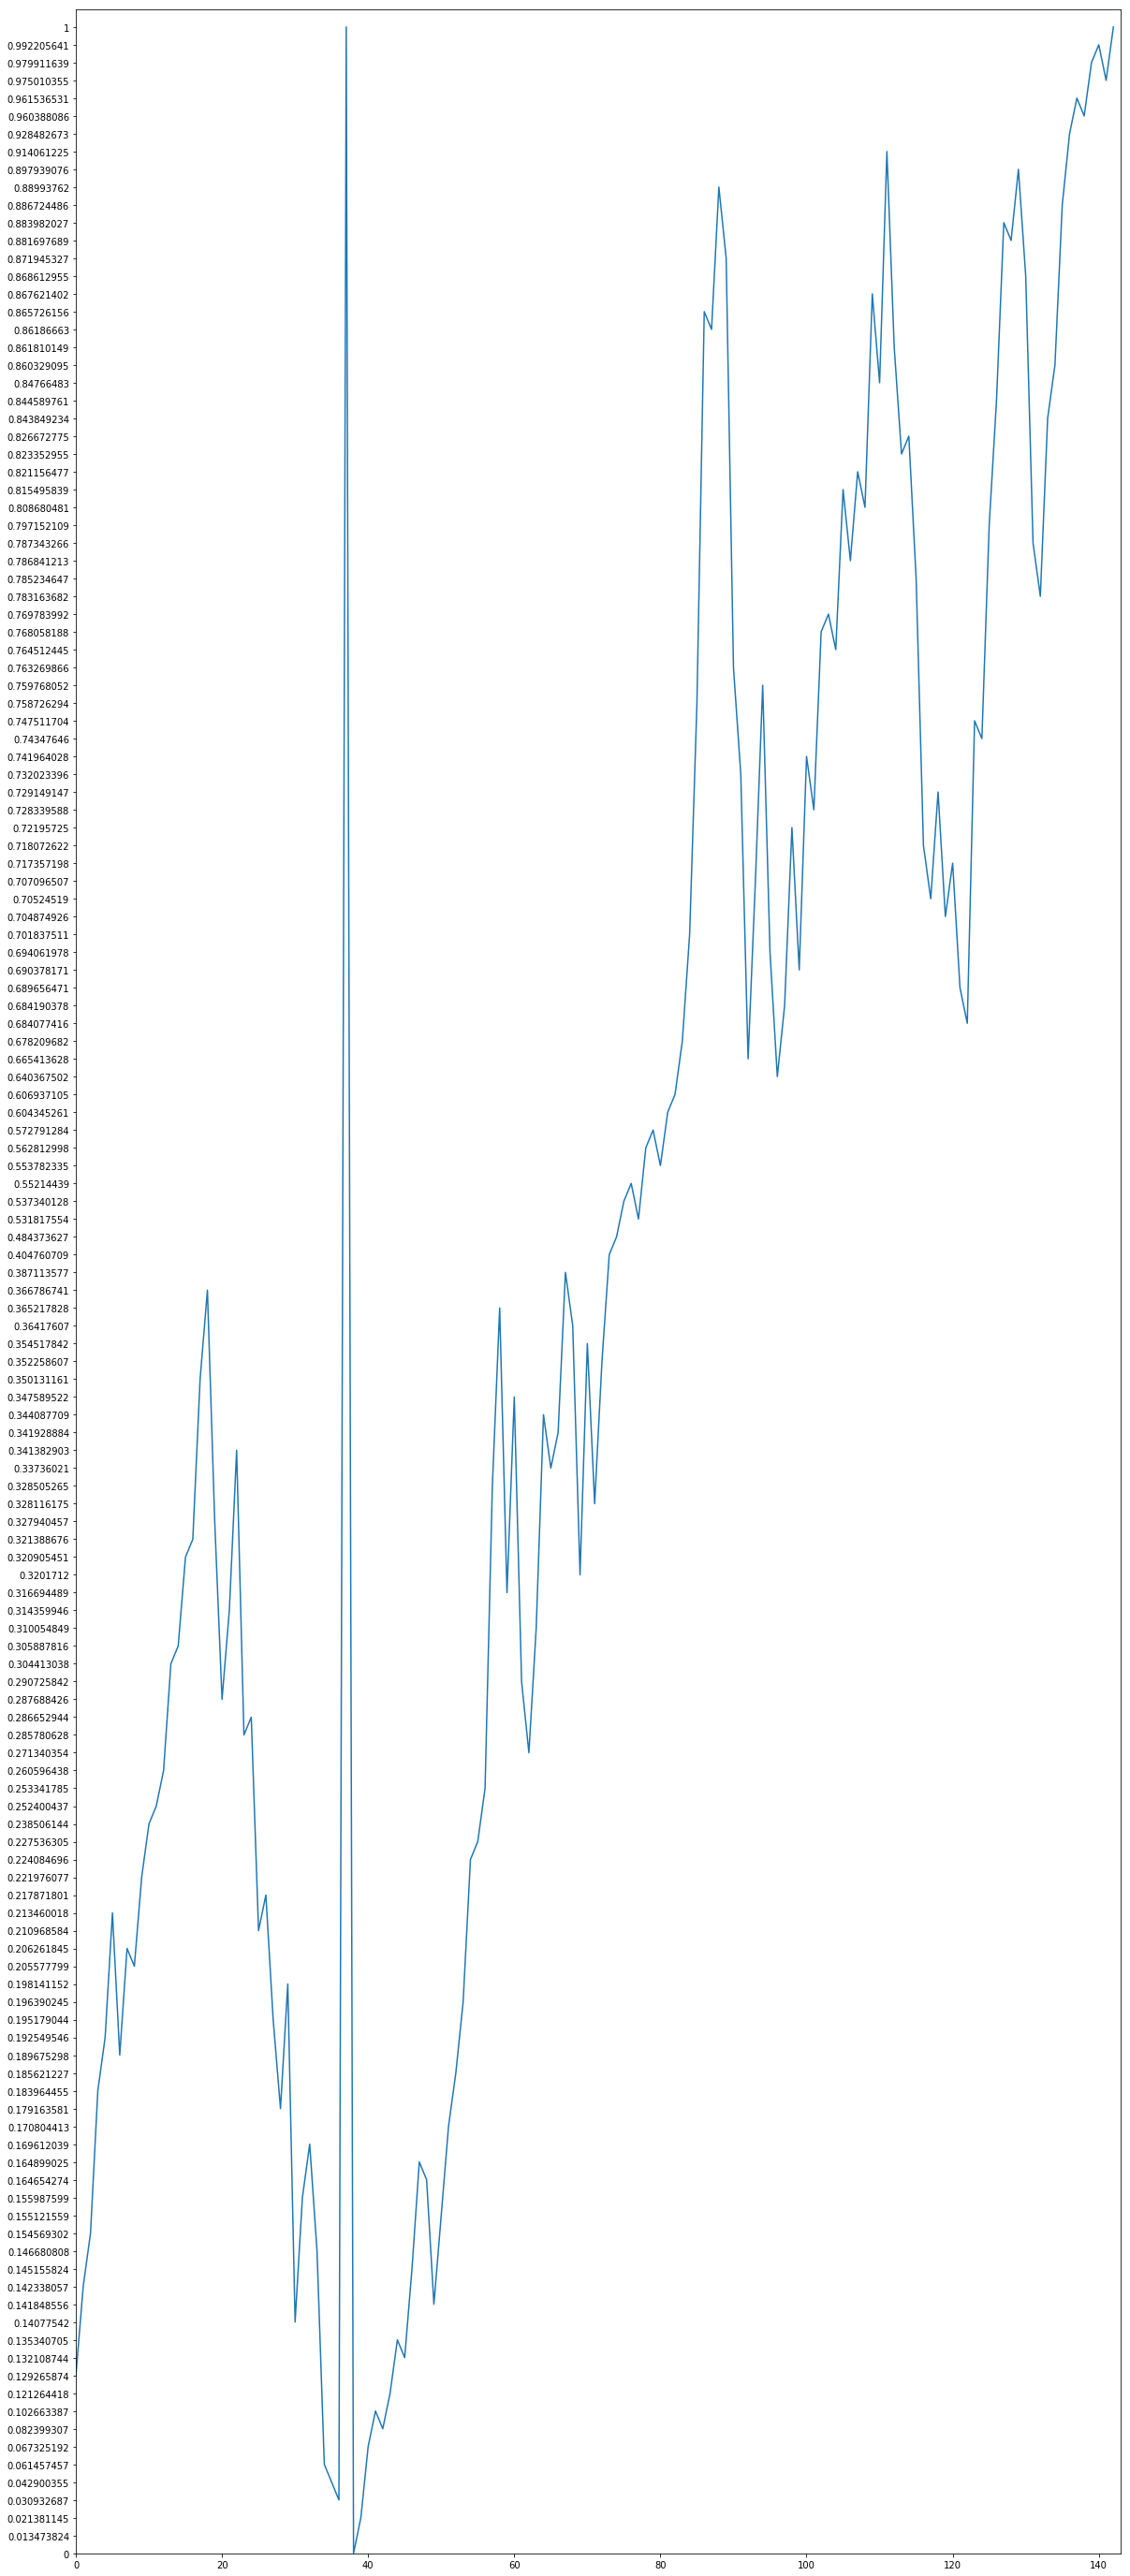

In [80]:
posterior = 0
prior = 0

financials = []
industrials = []
holfirms = []
propty = []
services = []
minoil = []
xaxis = []
xnum = 0
data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
with open('stock.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    for row in readCSV:
        financials.append(row[0])
        #industrials.append(row[1])
        #holfirms.append(row[2])
        #propty.append(row[3])
        #services.append(row[4])
        #minoil.append(row[5])
        xaxis.append(xnum)
        xnum = xnum + 1
        print(row[0])
        

        
plt.figure(figsize=(20,50))
plt.plot(xaxis, financials)
plt.axis([0, 143, 0, 143])
plt.show()

#plt.autoscale(False)
#plt.gca().invert_yaxis()
#plt.ylim(600, 2000)
#fig = plt.figure()
#ax = fig.gca()
#ax.set_autoscale_on(False)
#ax.plot(financials)
#ax.axis([0, 143, -1, 1000])
#ax.set_yticks([-1, 0, 1])
#plt.yticks(np.arange(min(financials), max(financials)+ 1, 1.0))
#fig.show()
#plt.ylim(-1, 1)
#plt.figure()
#plt.ylim([0, 30])
#plt.plot(services)
#plt.yticks([])
#plt.autoscale(False)
#plt.ylim([75, 143])

